<a href="https://colab.research.google.com/github/dongyoon9802/R_machine_learning/blob/main/creditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/train.csv')
cardData=pd.read_csv('/content/drive/MyDrive/creditcard.csv')#csv파일 가져오기
display(cardData.head(5))# 맨 위 5줄만 출력
print("연습 세트\n"+"행 : "+str(cardData.shape[0])+" 열 : "+ str(cardData.shape[1]))

#결측치란 데이터에 값이 없는 것을 말하며 데이터를 분석하는데 있어 큰 방해가 된다
print('결측치 = '+str(cardData.isnull().sum().max()))#cardDate에서 null값이 있는 것들의 총 합의 최대 값을 구함(없으니 결측치=0)
cardData.describe()

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


연습 세트
행 : 284807 열 : 31
결측치 = 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
cardData.info()
#Class 를 제외한 모든 피처는 float64형임을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

정상 :  99.83 % 
 이상 : 0.17 %


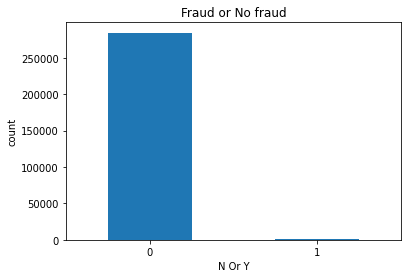

In [4]:
data = cardData

label_counts = data['Class'].value_counts().sort_index()#class column의 값이 1이면 사기거래 0이면 정상거래이니 value_counts를 사용하면 0,1각 각 counting되고 sorting하면 정확하게 구분 됨
label_counts.plot.bar()#그래프 그리기

plt.title('Fraud or No fraud');
plt.ylabel('count'); 
plt.xlabel('N Or Y'); 
plt.xticks( rotation = 0)

print('정상 : ', round(data['Class'].value_counts()[0] / len(data) *100,2),'%',
      '\n','이상 :', round(data['Class'].value_counts()[1] / len(data) *100,2),'%')

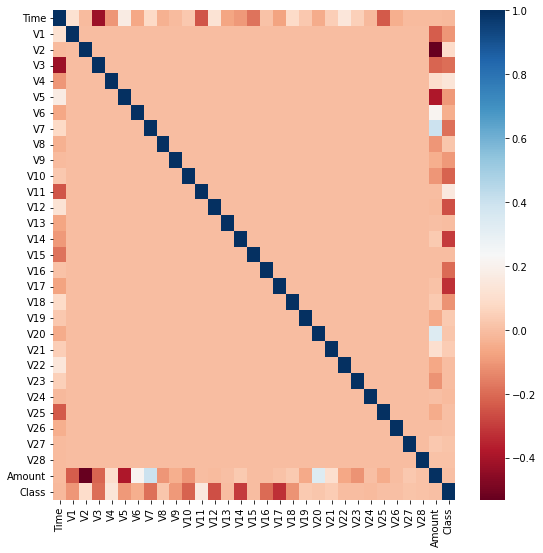

In [5]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr=data.corr()
sns.heatmap(corr,cmap='RdBu') #데이터셋을 corriration을 이용하여 히트맵으로 나타내고  이중에서 상관관계가 높은 clomumn을 찾음

In [6]:
#음의 상관관계가 높다는 것은 class=1일 확률이 높다는 뜻이므로 음의 상관관계가 가장 높은 v14와 v17의 이상치를 제거해주겠다.
def delOutlier(dat, col, weight=1.5):
  fraud = dat[dat['Class'] == 1][col]
  q25, q75 = np.percentile(fraud.values, 25), np.percentile(fraud.values, 75)
  iqr = q75 - q25
  iqr_weight= iqr * weight
  high, low = q75 + iqr_weight, q25 - iqr_weight
  outlier = [x for x in fraud if x < low or x> high]
  print(col+' outliers:{}'.format(outlier))
  newDat = dat.drop(dat[(dat[col] > high) | (dat[col] < low)].index)
  return newDat
data = delOutlier(data,'V14',weight=1.5)
data = delOutlier(data,'V12',weight=1.5)
data = delOutlier(data,'V10',weight=1.5)

V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
V12 outliers:[-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
V10 outliers:[-15.1241628144947, -16.6496281595399, -18.2711681738888, -15.2399619587112, -15.2399619587112, -14.9246547735487, -14.9246547735487, -15.5637913387301, -15.5637913387301, -16.7460441053944, -15.3460988468775, -15.1237521803455, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -15.2318333653018, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]


In [7]:
from sklearn.preprocessing import StandardScaler


def getTrainAndTestSet(data=None): 
  cpyDat = data.copy() 
  cpyDat.drop("Time", axis=1, inplace=True,errors='raise') #time column의 경우 데이터 생성 관련한 작업용 속성으로 제거한다.
  trainX, test_x, trainY, test_y = train_test_split(cpyDat.iloc[:,:-1], #행데이터
                                                      cpyDat.iloc[:,-1], #열 데이터
                                                      test_size=0.3, #7:3비율로 split
                                                      stratify=cpyDat.iloc[:,29], 
                                                      random_state=100) 
  return trainX, test_x, trainY, test_y

nomal_trainX, nomal_test_x, nomal_trainY, nomal_test_y = getTrainAndTestSet(data)
trainX, test_x, trainY, test_y = getTrainAndTestSet(cardData)
print('학습세트 레이블% : \n', str(trainY.value_counts()/trainY.shape[0] * 100),'\n\n',
      '테스트세트 레이블% : \n', str(test_y.value_counts()/test_y.shape[0] * 100))
overTestX = test_x.copy()
overTestY = test_y.copy()

학습세트 레이블% : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64 

 테스트세트 레이블% : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


0    0.5
1    0.5
Name: Class, dtype: float64

원본 세트
행 : 284807 열 : 31

언더샘플링 세트
행 : 984 열 : 31


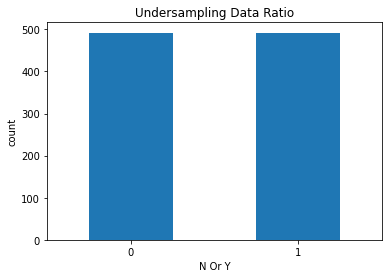

In [8]:
data = cardData.sample(frac=1)
fraud = cardData.loc[cardData['Class'] == 1] # 사기거래 데이터
noFraud  = cardData.loc[cardData['Class'] == 0][:492] # No사기거래데이터
seperatedDat= pd.concat([fraud, noFraud]) #데이터 결합
finalDat = seperatedDat.sample(frac=1, random_state=100)# seperateDat의 데이터 전부 추출
finalDat.head()

print(str(finalDat['Class'].value_counts()/len(finalDat))+"\n")
print("원본 세트\n"+"행 : "+str(data.shape[0])+" 열 : "+ str(data.shape[1])+"\n")
print("언더샘플링 세트\n"+"행 : "+str(finalDat.shape[0])+" 열 : "+ str(finalDat.shape[1]))

label_counts = finalDat['Class'].value_counts().sort_index()#데이터 값별로 모두 카운팅
label_counts.plot.bar()

plt.title('Undersampling Data Ratio');
plt.ylabel('count'); 
plt.xlabel('N Or Y'); 
plt.xticks( rotation = 0)

x = finalDat.drop('Class', axis = 1)
y = finalDat['Class']

In [9]:
from imblearn.over_sampling import SMOTE

trainOver_x, trainOver_y = SMOTE(random_state=42).fit_resample(trainX, trainY) #이상치가 제거되지 않은 원래의 트레이닝 세트를 오버샘플링함
overDat= pd.concat([trainOver_x, trainOver_y])#분리한 오버샘플링 트레이닝 세트를 결합
finalDatOver = overDat.sample(frac=1, random_state=42) #모두 추출
finalDatOver.head()

# print(' 오버샘플링 데이터 \n ', trainOver_x.shape, trainOver_y.shape)
# print('데이터 분포 \n', pd.Series(trainOver_y).value_counts())


,0,Amount,V1,V10,V11,V12,V13,V14,V15,V16,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
108568,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257422,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358454,NaN,182.506331,-2.716333,-1.392663,3.851190,-7.777626,0.922473,-6.704379,-0.974567,-3.205325,...,-0.040183,-1.337730,-0.209349,-3.100420,4.835688,-1.198025,0.221631,-1.608443,-1.269778,0.362836
300240,NaN,112.042399,-2.240099,-4.729646,3.396378,-4.744387,-1.338035,-4.950106,0.214643,-5.216775,...,-0.570486,0.128330,0.110474,-5.435769,4.370105,-4.139830,-0.473014,-5.695830,0.363636,-1.814559
275064,NaN,0.154257,-4.669109,-5.363305,3.445635,-6.089149,0.111935,-8.615560,1.446936,-4.752582,...,0.350656,-1.044018,1.040248,-6.379274,2.843805,-1.663898,-2.463393,-4.119961,0.896599,-2.217512


In [10]:
log_reg_params = {
    "penalty":['l1', 'l2'],
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
tree_params = {
    "criterion":["gini", "entropy"],
    "max_depth":list(range(2,4,1)),
    "min_samples_leaf":list(range(5,7,1))
}
lgbm_params = {
    "learning_rate":list(np.arange(0.1,1.0,0.1)),
    "n_estimators":list(range(100,1000,100)),
    "num_leaves":list(range(10,100,10)),
    "subsample":list(np.arange(0.5,1,0.1)),
    "n_jobs":[-1],
    "boost_from_average":[True]
}

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)#Light GBM



def getPerformance(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)#모델 피팅
    pred=model.predict(feature_test)#예측치 구하기
    pred_proba=model.predict_proba(feature_test)[:,1]#사기와 no사기 어디에 속할지 확률값 반환
    accuracy=accuracy_score(target_test,pred)
    precision=precision_score(target_test,pred)
    recall=recall_score(target_test,pred)
    f1=f1_score(target_test,pred)
    roc_auc=roc_auc_score(target_test,pred_proba)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

def getConfusionMatrix(txt, model,testX, testY):
    matrix = plot_confusion_matrix(model,testX,testY, cmap = plt.cm.Reds)
    matrix.ax_.set_title(txt,color='black')
    plt.gcf().axes[0].tick_params(colors='white')
    plt.gcf().axes[1].tick_params(colors='white')
    plt.show()

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(6,6))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0,1],[0,1],'k--',label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()



In [21]:
from sklearn.metrics import precision_recall_curve
def getRecallCurvePlot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
 
    plt.figure(figsize=(10, 7))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()

In [12]:
lr_clf_val= GridSearchCV(LogisticRegression(), log_reg_params).fit(nomal_trainX, nomal_trainY) # LogisticRegression
lr_clf = lr_clf_val.best_estimator_

dt_clf_val = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(nomal_trainX, nomal_trainY)#decision tree
dt_clf = dt_clf_val.best_estimator_
models = [lr_clf, lgbm_clf, dt_clf]
model_names = ['LogiReg', 'LightGBM', 'DecisionTree']

LogiticsRegression(nomal)
정확도: 0.9992, 정밀도: 0.8190, 재현율: 0.6277, F1: 0.7107, AUC: 0.9556


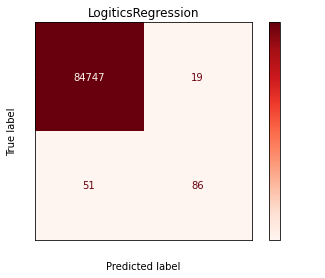

LightGBM(nomal)
정확도: 0.9996, 정밀도: 0.9818, 재현율: 0.7883, F1: 0.8745, AUC: 0.9823


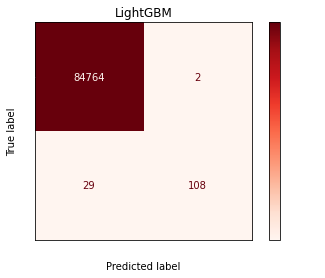

DecisionTree(nomal)
정확도: 0.9995, 정밀도: 0.8692, 재현율: 0.8248, F1: 0.8464, AUC: 0.9543


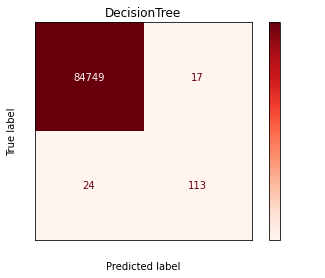

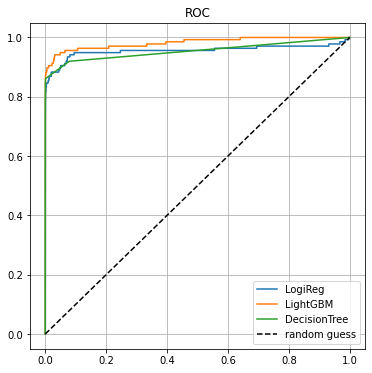

In [14]:
models = [lr_clf, lgbm_clf, dt_clf]
model_names = ['LogiReg', 'LightGBM', 'DecisionTree']

print('LogiticsRegression(nomal)')
getPerformance(lr_clf,nomal_trainX,nomal_test_x,nomal_trainY,nomal_test_y)
getConfusionMatrix('LogiticsRegression', lr_clf,nomal_test_x, nomal_test_y)

print('LightGBM(nomal)')
getPerformance(lgbm_clf,nomal_trainX,nomal_test_x,nomal_trainY,nomal_test_y)
getConfusionMatrix('LightGBM', lgbm_clf,nomal_test_x, nomal_test_y)

print('DecisionTree(nomal)')
getPerformance(dt_clf,nomal_trainX,nomal_test_x,nomal_trainY,nomal_test_y)
getConfusionMatrix('DecisionTree', dt_clf,nomal_test_x, nomal_test_y)

draw_roc_curve(models, model_names, nomal_test_x, nomal_test_y)

#############################################################
# models = [lr_clf, lgbm_clf, dt_clf]
# model_names = ['LogiReg', 'LightGBM', 'DecisionTree']

# print('LogiticsRegression(nomal)')
# getPerformance(lr_clf,trainX,test_x,trainY,test_y)
# getConfusionMatrix('LogiticsRegression', lr_clf,test_x, test_y)

# print('LightGBM(nomal)')
# getPerformance(lgbm_clf,trainX,test_x,trainY,test_y)
# getConfusionMatrix('LightGBM', lgbm_clf,test_x, test_y)

# print('DecisionTree(nomal)')
# getPerformance(dt_clf,trainX,test_x,trainY,test_y)
# getConfusionMatrix('DecisionTree', dt_clf,test_x, test_y)

# draw_roc_curve(models, model_names, test_x, test_y)

In [16]:
trainUnderX, testUnder_x, trainUnderY, testUnder_y = getTrainAndTestSet(finalDat)

lr_clf_val= GridSearchCV(LogisticRegression(), log_reg_params).fit(trainUnderX, trainUnderY) # LogisticRegression
lr_clf = lr_clf_val.best_estimator_

dt_clf_val = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(trainUnderX, trainUnderY)#decision tree
dt_clf = dt_clf_val.best_estimator_


LogiticsRegression (Under sample)
정확도: 0.9257, 정밀도: 0.9315, 재현율: 0.9189, F1: 0.9252, AUC: 0.9833


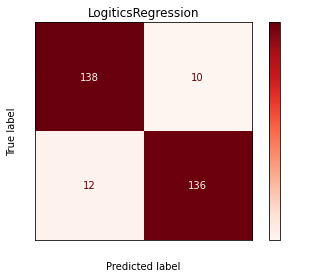

LightGBM (Under sample)
정확도: 0.9426, 정밀도: 0.9456, 재현율: 0.9392, F1: 0.9424, AUC: 0.9863


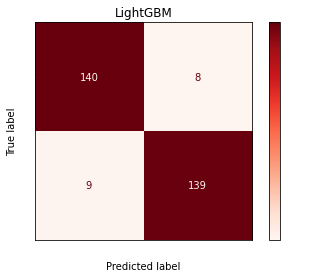

DecisionTree(Under sample)
정확도: 0.9155, 정밀도: 0.8868, 재현율: 0.9527, F1: 0.9186, AUC: 0.9515


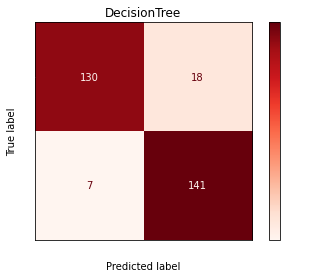

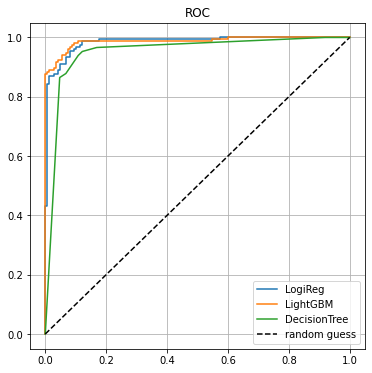

In [17]:

models = [lr_clf, lgbm_clf, dt_clf]
model_names = ['LogiReg', 'LightGBM', 'DecisionTree']

print('LogiticsRegression (Under sample)')
getPerformance(lr_clf,trainUnderX,testUnder_x,trainUnderY,testUnder_y)
getConfusionMatrix('LogiticsRegression', lr_clf,testUnder_x, testUnder_y)

print('LightGBM (Under sample)')
getPerformance(lgbm_clf,trainUnderX,testUnder_x,trainUnderY,testUnder_y)
getConfusionMatrix('LightGBM', lgbm_clf,testUnder_x, testUnder_y)

print('DecisionTree(Under sample)')
getPerformance(dt_clf,trainUnderX,testUnder_x,trainUnderY,testUnder_y)
getConfusionMatrix('DecisionTree', dt_clf,testUnder_x, testUnder_y)

draw_roc_curve(models, model_names, testUnder_x, testUnder_y)

In [18]:
lr_clf_val= GridSearchCV(LogisticRegression(), log_reg_params).fit(trainOver_x, trainOver_y) # LogisticRegression
lr_clf = lr_clf_val.best_estimator_

dt_clf_val = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(trainOver_x, trainOver_y)#decision tree
dt_clf = dt_clf_val.best_estimator_


LightGBM (Over sample)
정확도: 0.9994, 정밀도: 0.8333, 재현율: 0.8108, F1: 0.8219, AUC: 0.9807


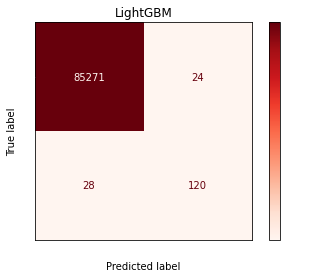

LogiticsRegression (Over sample)
정확도: 0.9797, 정밀도: 0.0695, 재현율: 0.8649, F1: 0.1286, AUC: 0.9722


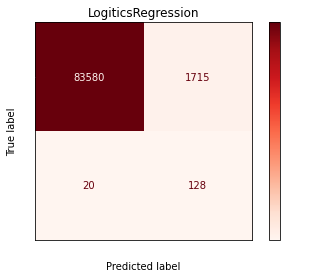

DecisionTree (Over sample)
정확도: 0.9619, 정밀도: 0.0378, 재현율: 0.8581, F1: 0.0724, AUC: 0.9447


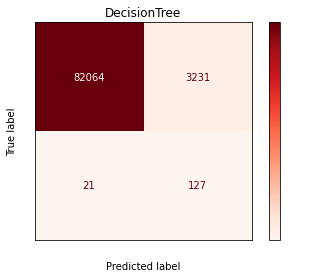

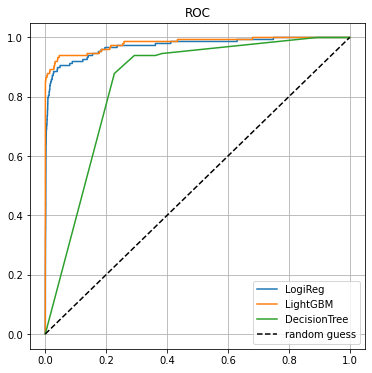

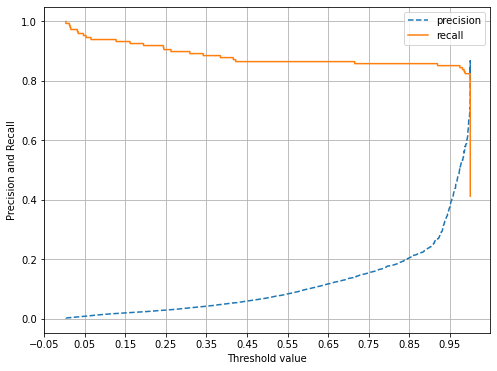

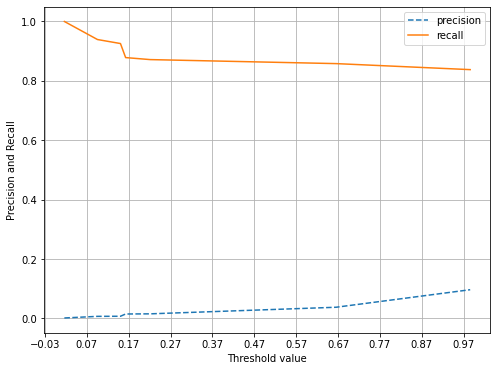

In [22]:
print('LightGBM (Over sample)')
getPerformance(lgbm_clf,trainOver_x,test_x,trainOver_y,test_y)
getConfusionMatrix('LightGBM', lgbm_clf,overTestX, overTestY)

print('LogiticsRegression (Over sample)')
getPerformance(lr_clf,trainOver_x,overTestX,trainOver_y,overTestY)
getConfusionMatrix('LogiticsRegression', lr_clf,overTestX, overTestY)

print('DecisionTree (Over sample)')
getPerformance(dt_clf,trainOver_x,overTestX,trainOver_y,overTestY)
getConfusionMatrix('DecisionTree', dt_clf,overTestX, overTestY)

draw_roc_curve(models, model_names, overTestX, overTestY)
getRecallCurvePlot(test_y, lr_clf.predict_proba(test_x)[:, 1])#로지스틱 임곗값에 따른 정밀도와 재현율 곡선
getRecallCurvePlot(test_y, dt_clf.predict_proba(test_x)[:, 1])#디시전 임곗값에 따른 정밀도와 재현율 곡선